# BP+MWPM Decoder for XZZX Surface Code

In this tutorial, we present some simple explanations of the codebase and how to run it.

In [1]:
%reload_ext autoreload
%autoreload 2

Load all the necessary packages

In [2]:
from src.xzzx import XZZXDecoderBase as XZZXDecoder
import src.globals as g

Define the lattice size and bias of interest

In [3]:
d = 5 # List of lattice sizes
eta = 1 # Noise bias

Predefine the aspect ratio of the rectangular lattice for different noise biases. This is necessary because for large biases, the probability for the unbiased logical operator to flip is very small. To minimize the number of shots needed for reducing the error bars of data analysis, we increase the length of the edges corresponding to the unbiased logical operator. 

In [4]:
if eta == 1:
    N_ROW = N_COL = d
elif eta == 2:
    N_ROW = N_COL = d
elif eta == 20:
    N_ROW = d
    N_COL = int(round(d * 4.143))
elif eta == 200:
    N_ROW = d
    N_COL = int(round(d * 19.286))
elif eta == 0:
    N_ROW = 1
    N_COL = d

if N_COL % 2 == 0:
    N_COL -= 1

Prepare the decoder

In [5]:
# Keywords, decoder type to choose from: "mwpm", "bp", "bp+mwpm"
# noise_model by default is [0.04, 1, "Z"] as [biased error rate, bias, bias type]
decoder = XZZXDecoder(N_ROW, N_COL, 1, "bp+mwpm", noise_model=[0.04, 1, "Z"])

Do a test run and display the error graph with predicted edge weights

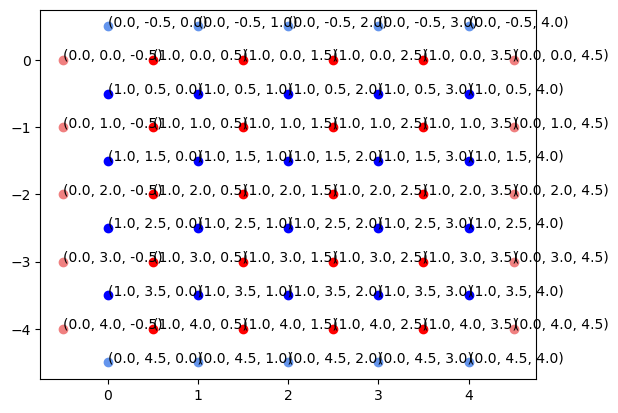

[SP] bp+mwpm, d=5x5, T=1, P=[0.88 0.04 0.04 0.04]:   0%|                                                 | 0/1 [00:00<?, ?it/s]

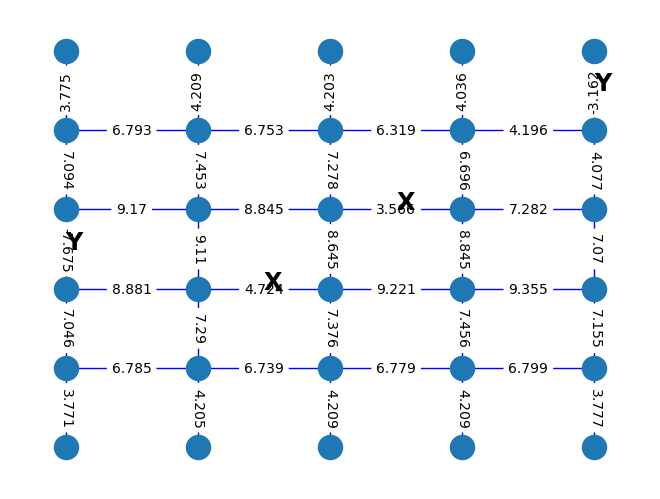

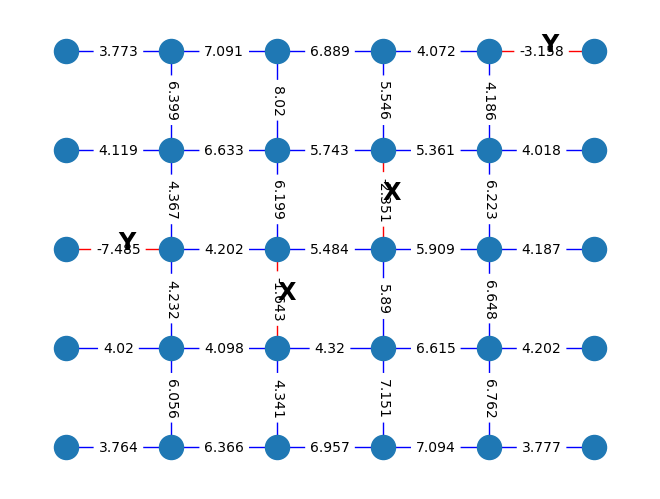

[SP] bp+mwpm, d=5x5, T=1, P=[0.88 0.04 0.04 0.04]: 100%|█████████████████████████████████████████| 1/1 [00:02<00:00,  2.68s/it]

[0. 0. 0.]


In [6]:
print(decoder.run_decoder(1, 50, num_cpu=32, lattice_graph=True, parallelize=False, display_progress=True))

Do a test of 1000 shots on all three decoders

In [7]:
decoder = XZZXDecoder(N_ROW, N_COL, 1, "bp", noise_model=[0.04, 1, "Z"])
print(decoder.run_decoder(1000, 50, num_cpu=32, lattice_graph=False, parallelize=True, display_progress=True))

[MP-32] bp, d=5x5, T=1, P=[0.88 0.04 0.04 0.04]: 100%|████████████████████████████████████| 1000/1000 [00:09<00:00, 101.83it/s]

[0.318 0.185 0.173]


In [8]:
decoder = XZZXDecoder(N_ROW, N_COL, 1, "mwpm", noise_model=[0.04, 1, "Z"])
print(decoder.run_decoder(1000, 50, num_cpu=32, lattice_graph=False, parallelize=True, display_progress=True))

[MP-32] mwpm, d=5x5, T=1, P=[0.88 0.04 0.04 0.04]: 100%|████████████████████████████████| 1000/1000 [00:00<00:00, 10799.37it/s]

[0.186 0.103 0.093]


In [9]:
decoder = XZZXDecoder(N_ROW, N_COL, 1, "bp+mwpm", noise_model=[0.04, 1, "Z"])
print(decoder.run_decoder(1000, 50, num_cpu=32, lattice_graph=False, parallelize=True, display_progress=True))

[MP-32] bp+mwpm, d=5x5, T=1, P=[0.88 0.04 0.04 0.04]: 100%|███████████████████████████████| 1000/1000 [00:01<00:00, 983.42it/s]

[0.09  0.055 0.038]


The items in the lists returned are logical error rate, X logical error rate, and Z logical error rate respectively. Obviouslym BP+MWPM decoder outperforms the other two in this test run.